In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data_A = pd.read_csv('[Daytime]A.csv')
data_B = pd.read_csv('[Daytime]B.csv')
data_A.drop(columns=['Unnamed: 0'],inplace=True)
data_B.drop(columns=['Unnamed: 0'],inplace=True)
data_A['date'] = pd.to_datetime(data_A['date'])
data_B['date'] = pd.to_datetime(data_B['date'])


In [53]:
data_A['date_hour'] = data_A['date'].dt.strftime('%Y %m %d %H')
data_A['date_hour'] = pd.to_datetime(data_A['date_hour'])
data_B['date_hour'] = data_B['date'].dt.strftime('%Y %m %d %H')
data_B['date_hour'] = pd.to_datetime(data_B['date_hour'])


In [54]:
def groupbydatehour(df, column):
    data = df.groupby('date_hour')[column].sum().reset_index()
    return data

In [55]:

dataA = []
for column in data_A.columns:
    if (column == 'date_hour') or (column =='date'):
        continue
    dataA.append(groupbydatehour(data_A, column))
dataB = []
for column in data_B.columns:
    if (column == 'date_hour') or (column =='date'):
        continue
    dataB.append(groupbydatehour(data_B, column))    

In [56]:
print(dataA[0])

             date_hour  batch_requests/sec
0  2024-04-23 05:00:00         5896.856734
1  2024-04-23 06:00:00        10803.308601
2  2024-04-23 07:00:00         9169.470237
3  2024-04-23 08:00:00         8134.822419
4  2024-04-23 09:00:00         6279.595279
5  2024-04-23 10:00:00        10414.741745
6  2024-04-23 11:00:00         6509.263907
7  2024-04-23 12:00:00         7368.965661
8  2024-04-23 13:00:00         6910.507043
9  2024-04-23 14:00:00         6638.227836
10 2024-04-23 15:00:00         6316.431280
11 2024-04-23 16:00:00         2206.837181
12 2024-04-24 05:00:00         7116.820353
13 2024-04-24 06:00:00         9268.884431
14 2024-04-24 07:00:00         9413.333185
15 2024-04-24 08:00:00         7761.326439
16 2024-04-24 09:00:00         7331.592944
17 2024-04-24 10:00:00         9981.997678
18 2024-04-24 11:00:00         7180.047769
19 2024-04-24 12:00:00         8098.825127
20 2024-04-24 13:00:00         7351.907498
21 2024-04-24 14:00:00         6581.653074
22 2024-04-

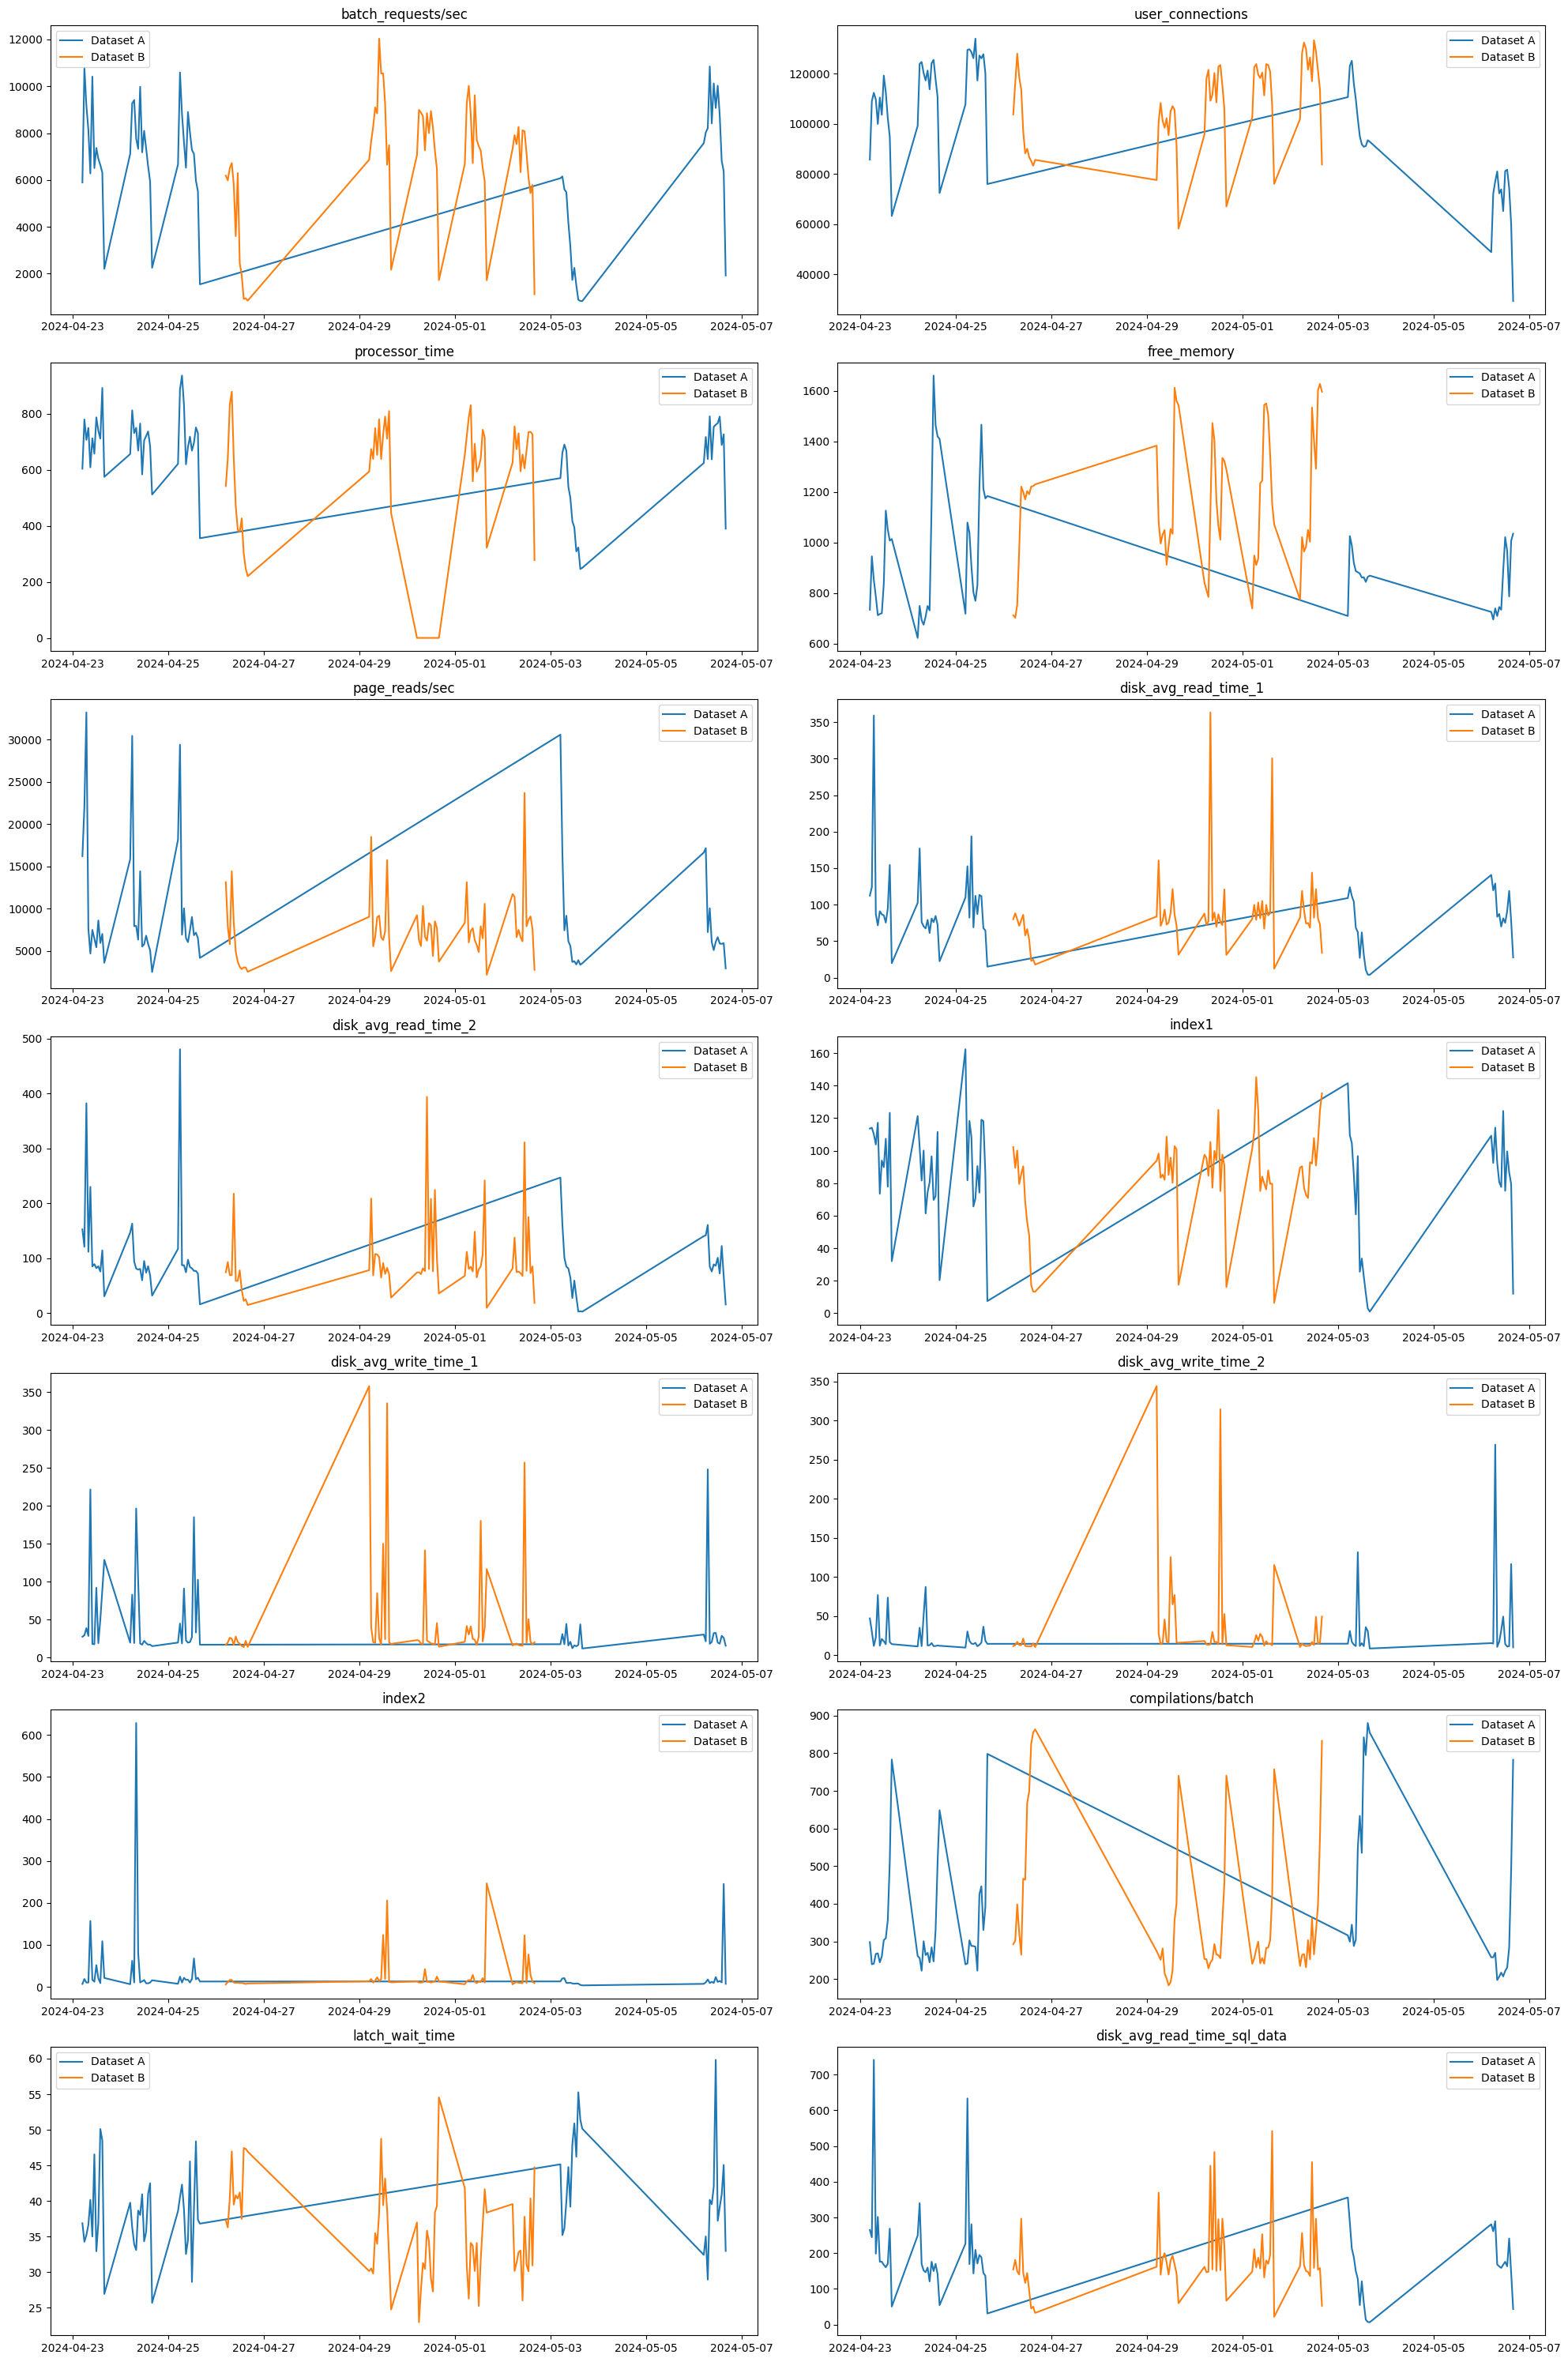

In [57]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each graph in a subplot
for i in range (len(dataA)):
    ax = axes[i]

    ax.plot(dataA[i]['date_hour'], dataA[i][dataA[i].columns[1]], label='Dataset A')
    ax.plot(dataB[i]['date_hour'], dataB[i][dataB[i].columns[1]], label='Dataset B')
    ax.set_title(dataA[i].columns[1])
    ax.legend()


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [58]:
def hour(dataset):
    new = []
    for i in range (len(dataset)):
        dataset[i]['date_hour'] = pd.to_datetime(dataset[i]['date_hour'])
        dataset[i]['hour'] = dataset[i]['date_hour'].dt.hour
        data = dataset[i].groupby(dataset[i]['hour'])[dataset[i].columns[1]].mean().reset_index()
        new.append(data)
    return new


In [59]:
data_hour_A = hour(dataA)
data_hour_B = hour(dataB)


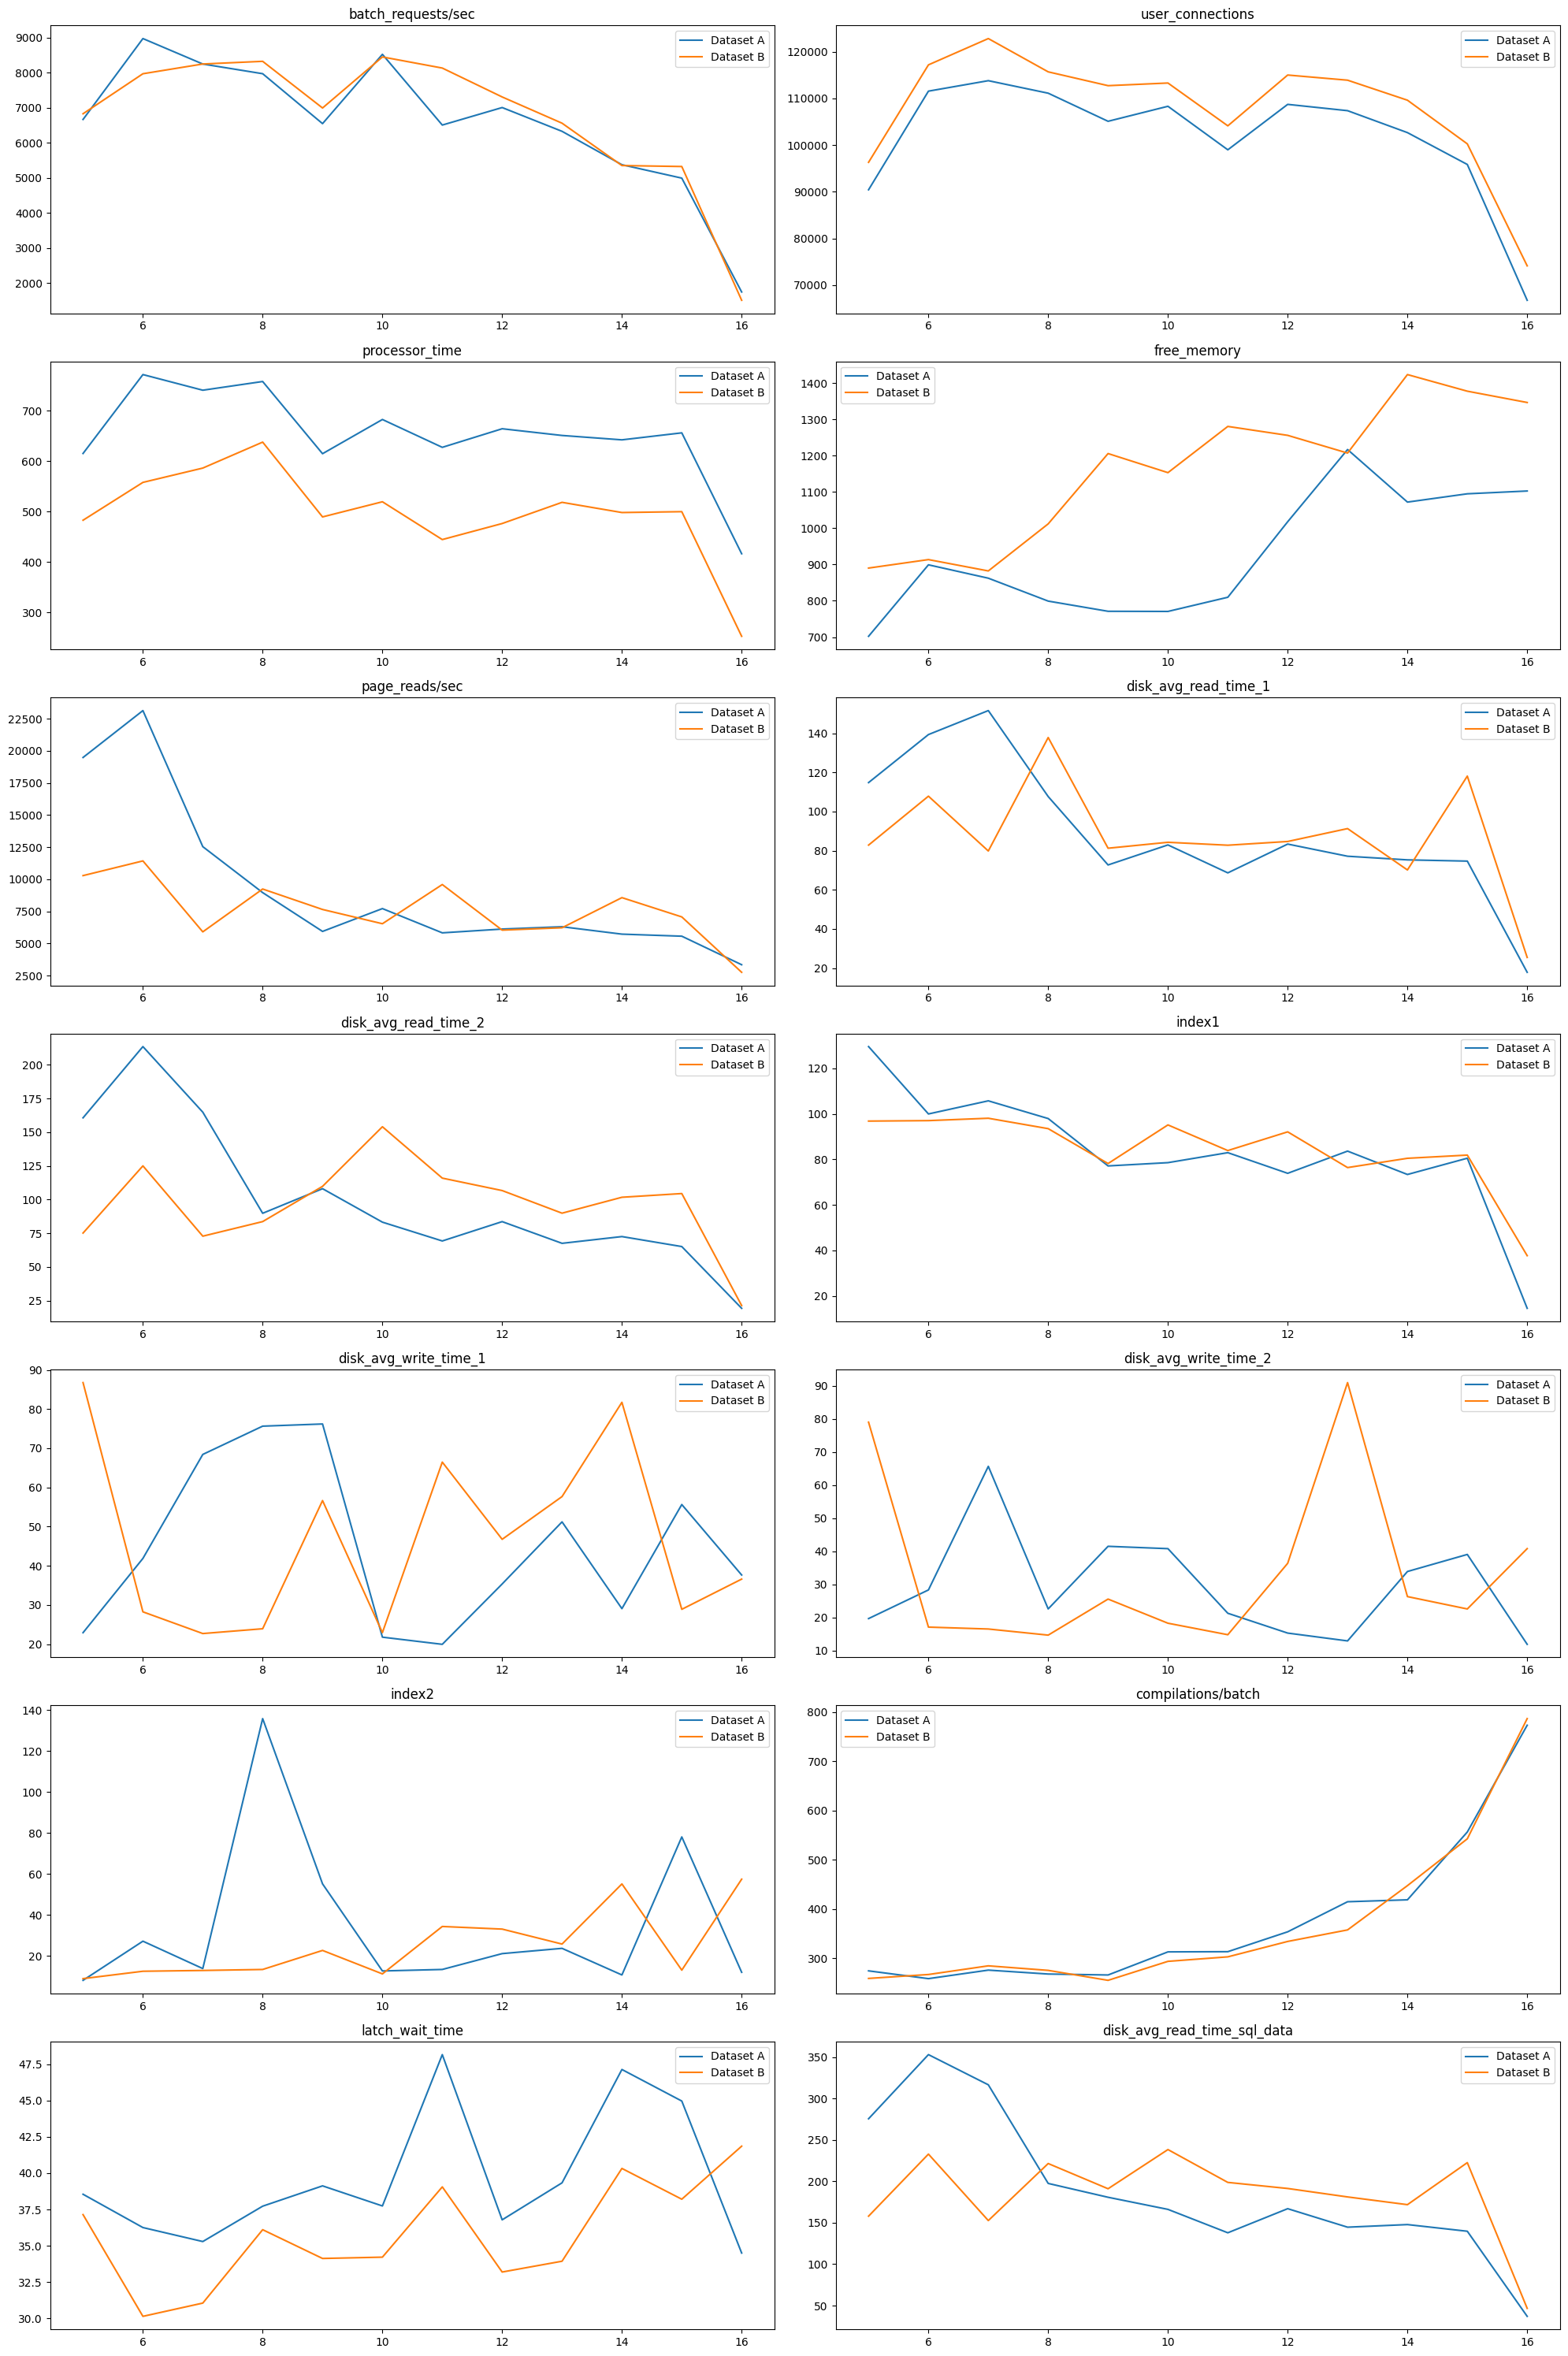

In [60]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each graph in a subplot
for i in range (len(data_hour_A)):
    ax = axes[i]

    ax.plot(data_hour_A[i]['hour'], data_hour_A[i][data_hour_A[i].columns[1]], label='Dataset A')
    ax.plot(data_hour_B[i]['hour'], data_hour_B[i][data_hour_B[i].columns[1]], label='Dataset B')
    ax.set_title(dataA[i].columns[1])
    ax.legend()


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

data_hour = hour(dataA)

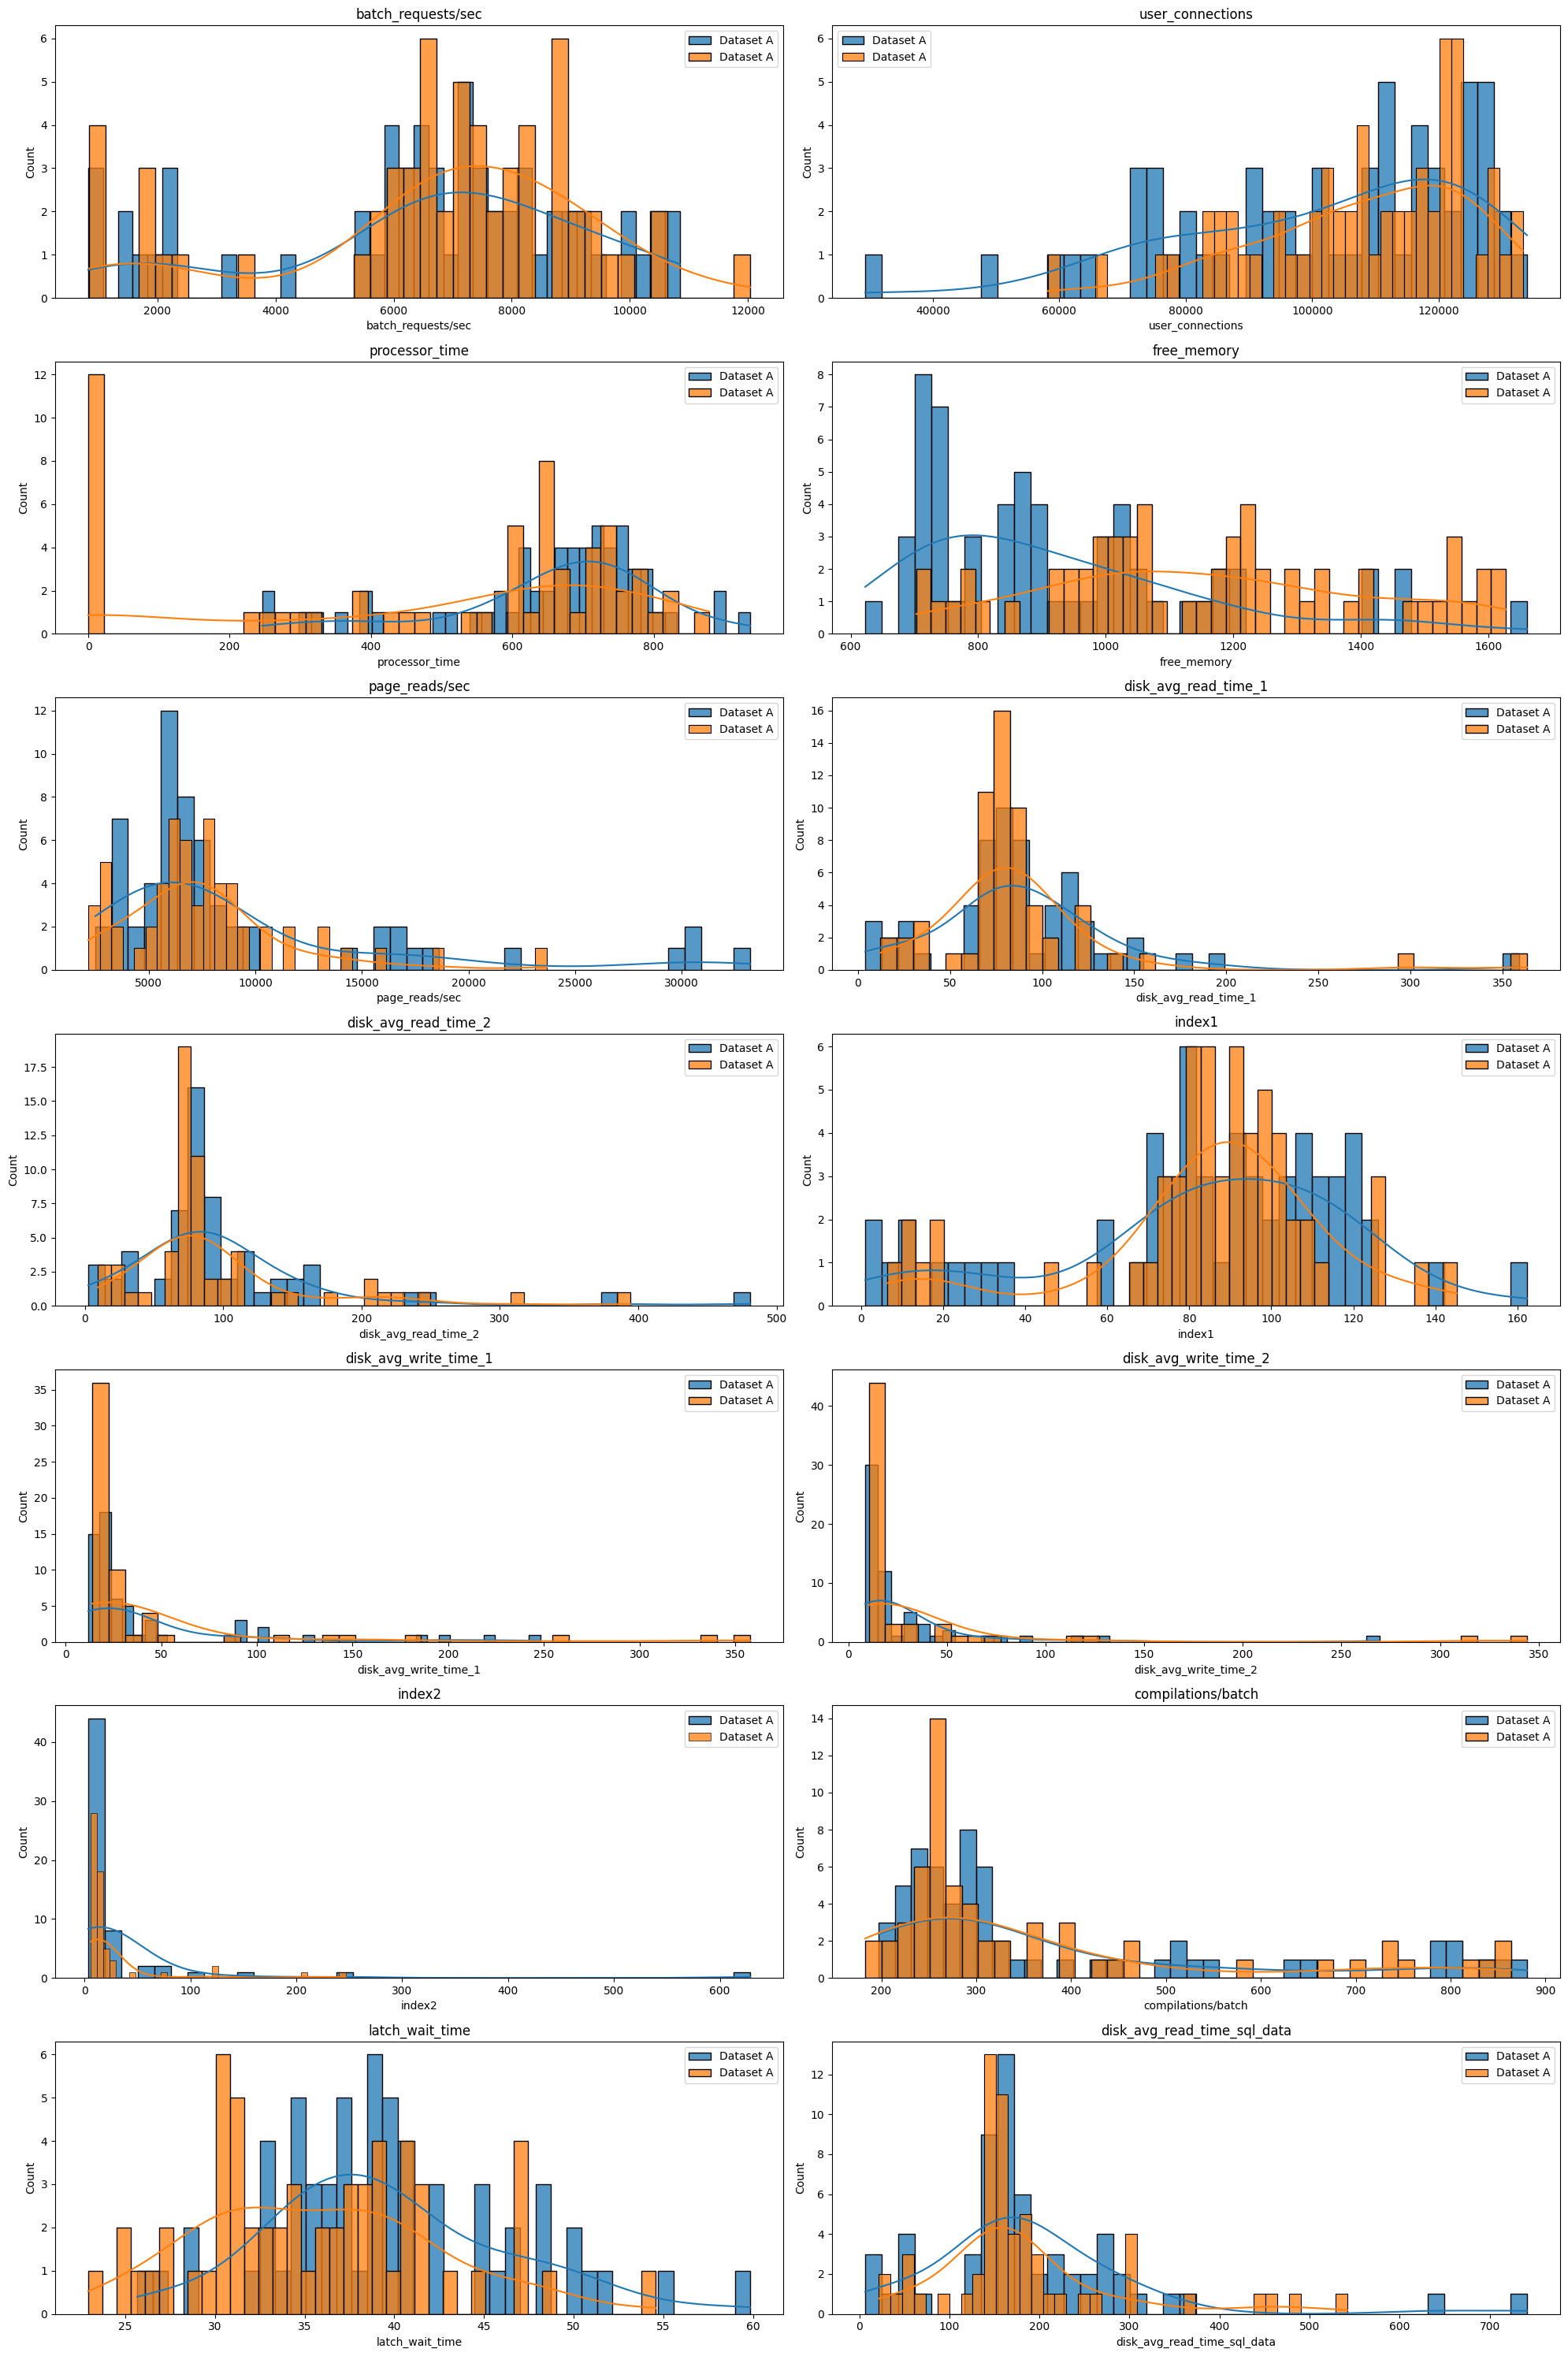

In [61]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each graph in a subplot
for i in range (len(dataA)):
    ax = axes[i]
    sns.histplot(data=dataA[i], x=dataA[i].columns[1], alpha=0.75, label='Dataset A', bins=40, kde=True, ax=ax)    
    sns.histplot(data=dataB[i], x=dataB[i].columns[1], alpha=0.75, label='Dataset A', bins=40, kde=True, ax=ax)    
    ax.set_title(dataA[i].columns[1])
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [86]:
def outliers(df,column):
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    subset = df[(df[column]<upper)]
    return subset

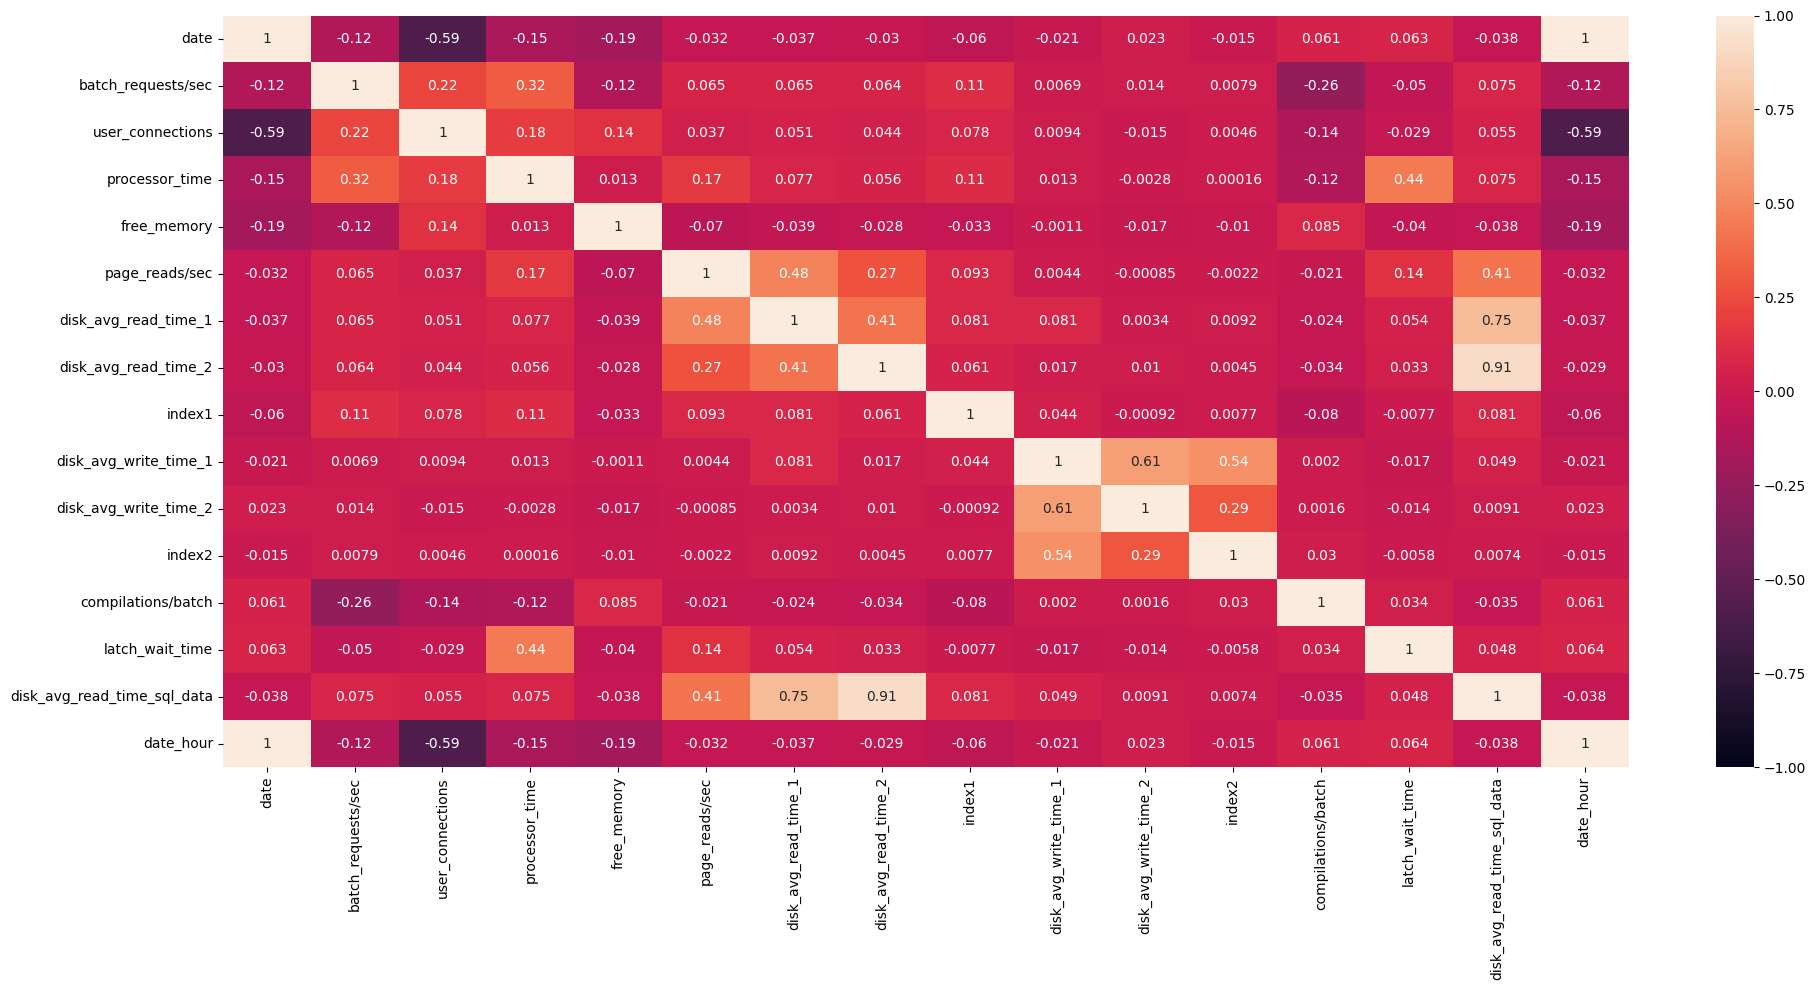

In [63]:
plt.figure(figsize=(20,10))
data_A_cor = data_A.corr()
heatmap = sns.heatmap(data_A_cor,vmin=-1, vmax= 1, annot = True)
plt.tight_layout()

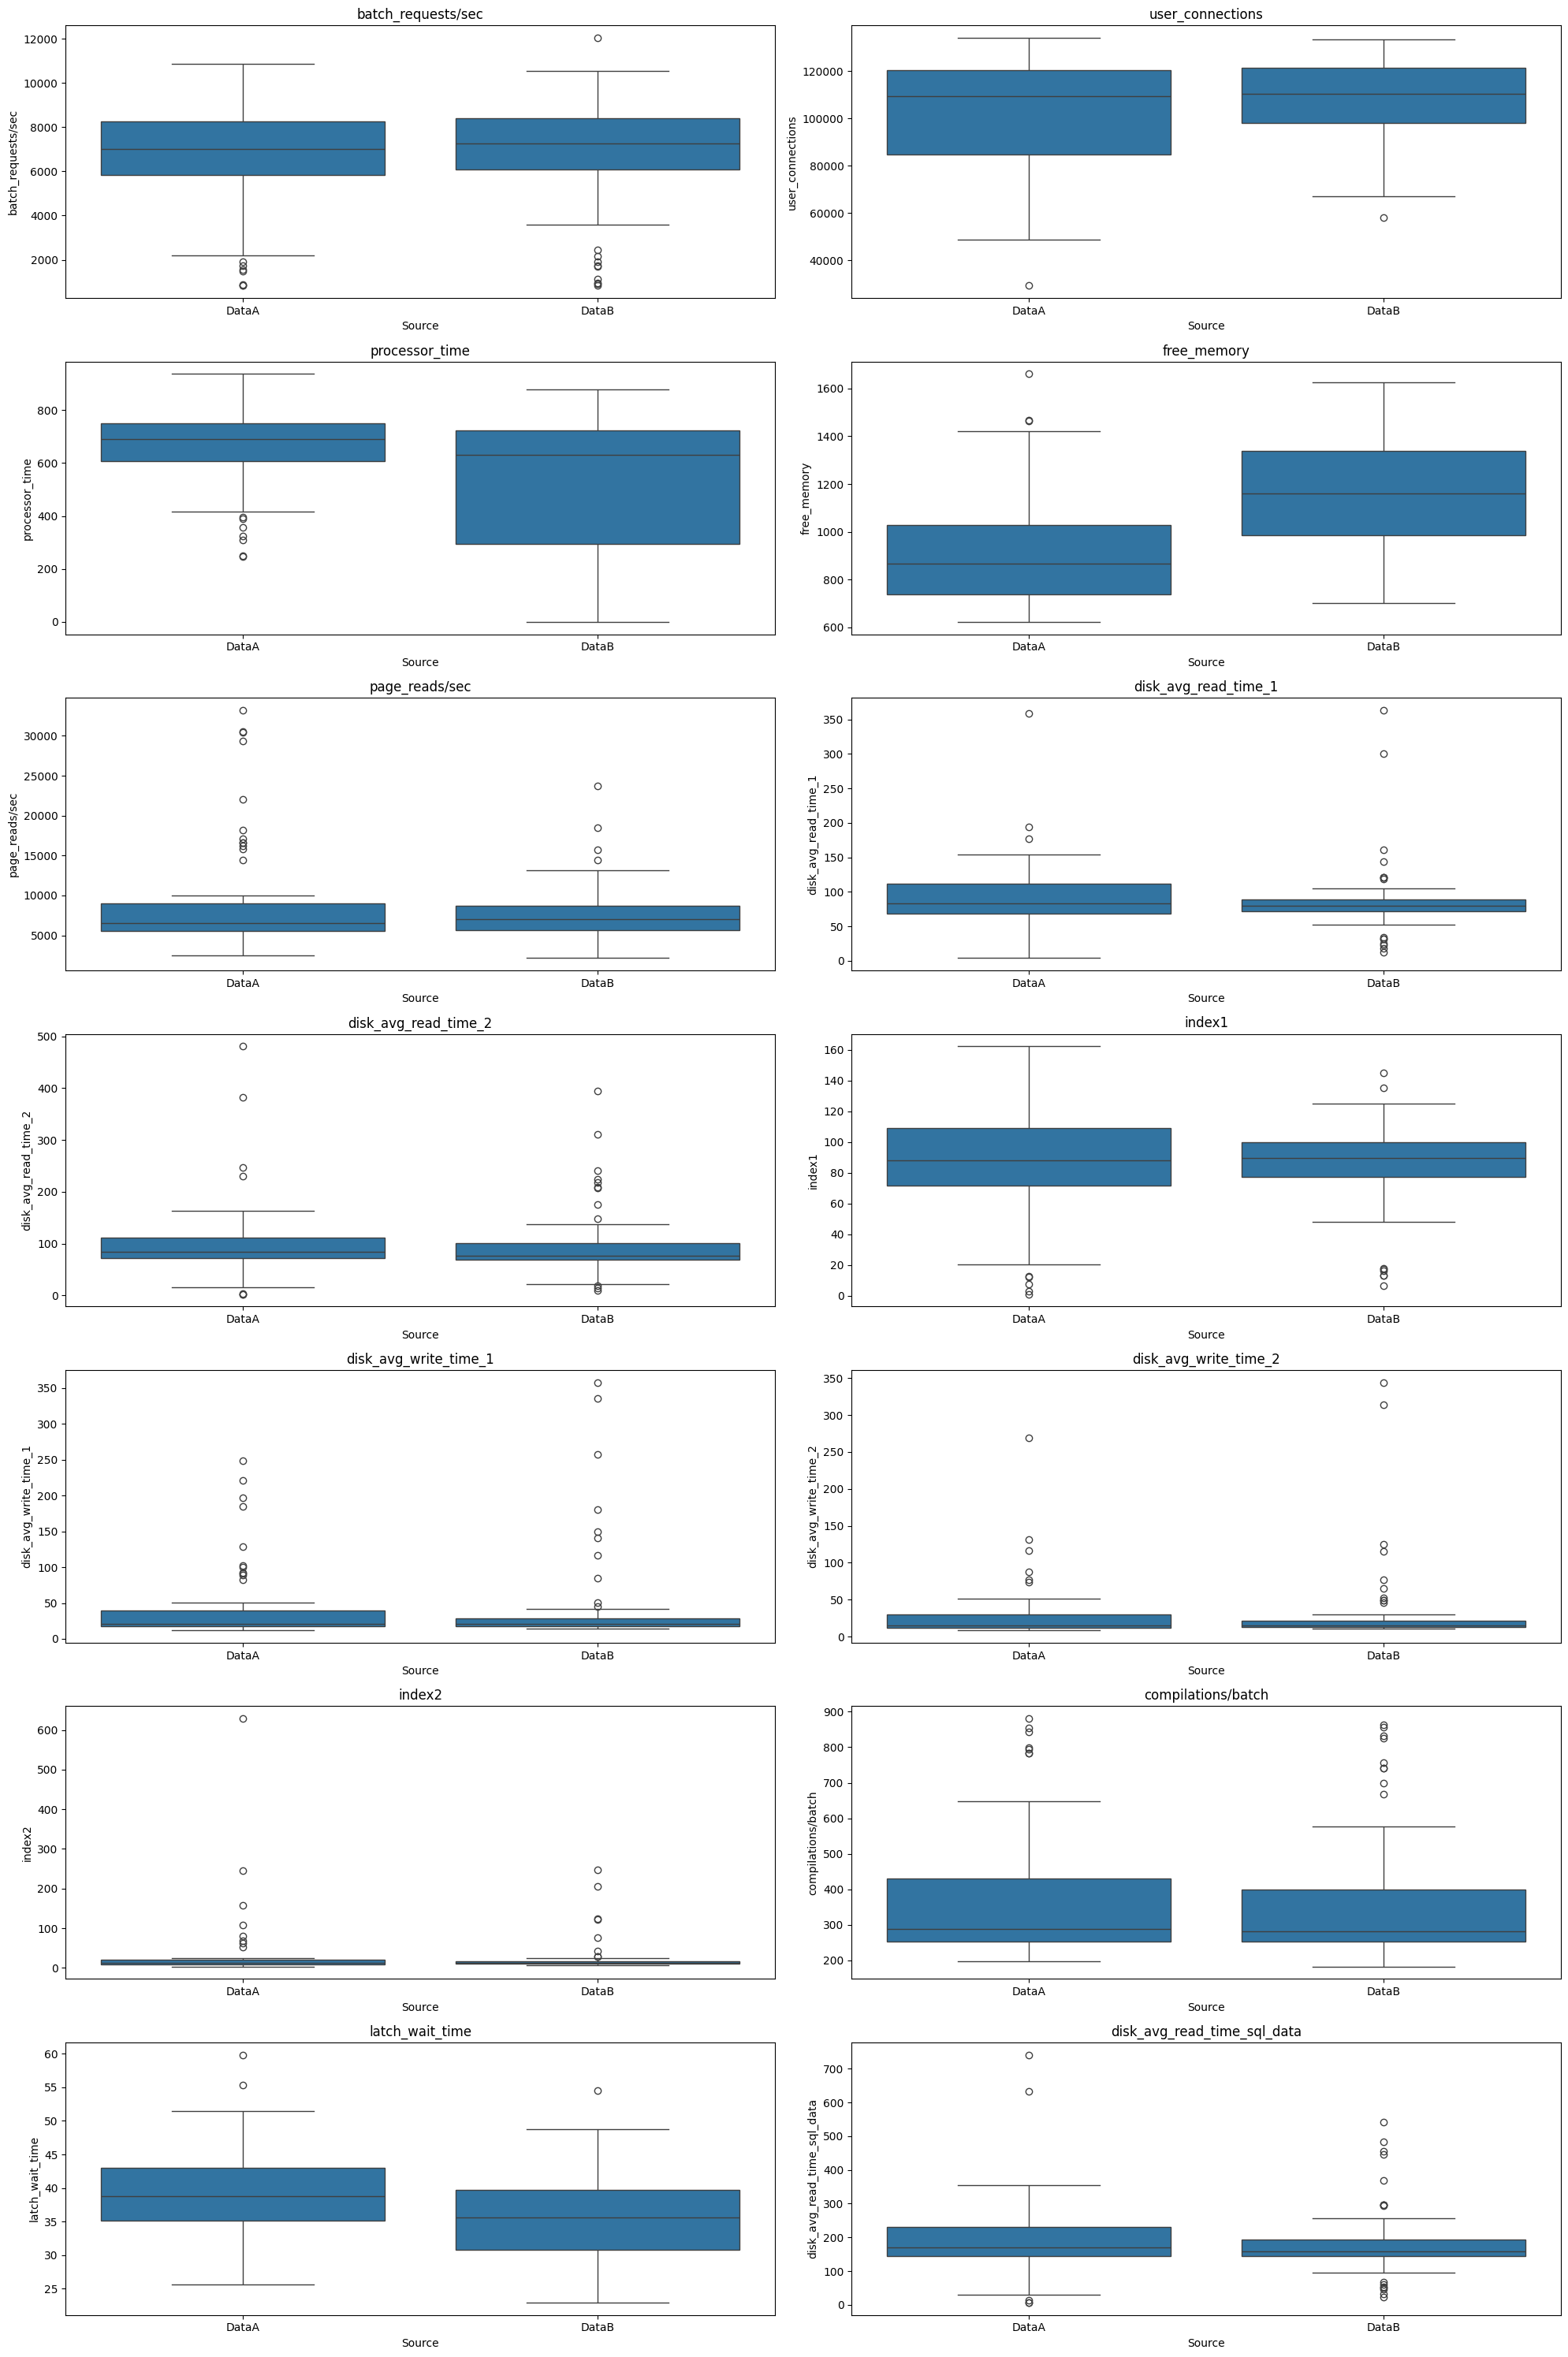

In [64]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each graph in a subplot
for i in range (len(dataA)):
    # Combine the two DataFrames with an additional 'Source' column
    dataA[i]['Source'] = 'DataA'
    dataB[i]['Source'] = 'DataB'
    
    combined_df = pd.concat([dataA[i], dataB[i]])
    
    ax = axes[i]
    
    # Create the boxplot with 'Source' as hue to differentiate
    sns.boxplot(data=combined_df, x='Source', y=combined_df.columns[1], ax = ax)
    
    ax.set_title(combined_df.columns[1])


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [87]:
subset1 = outliers(data_A,'disk_avg_write_time_1')
subset1 = outliers(subset1, 'disk_avg_write_time_2')
subset1 = outliers(subset1, 'index2')
subset1['source']= 'DatasetA'
subset2 = outliers(data_B,'disk_avg_write_time_1')
subset2 = outliers(subset2, 'disk_avg_write_time_2')
subset2 = outliers(subset2, 'index2')
subset2['source'] = 'DatasetB'
subset = pd.concat([subset1, subset2], ignore_index=True)


<Axes: xlabel='source', ylabel='disk_avg_write_time_2'>

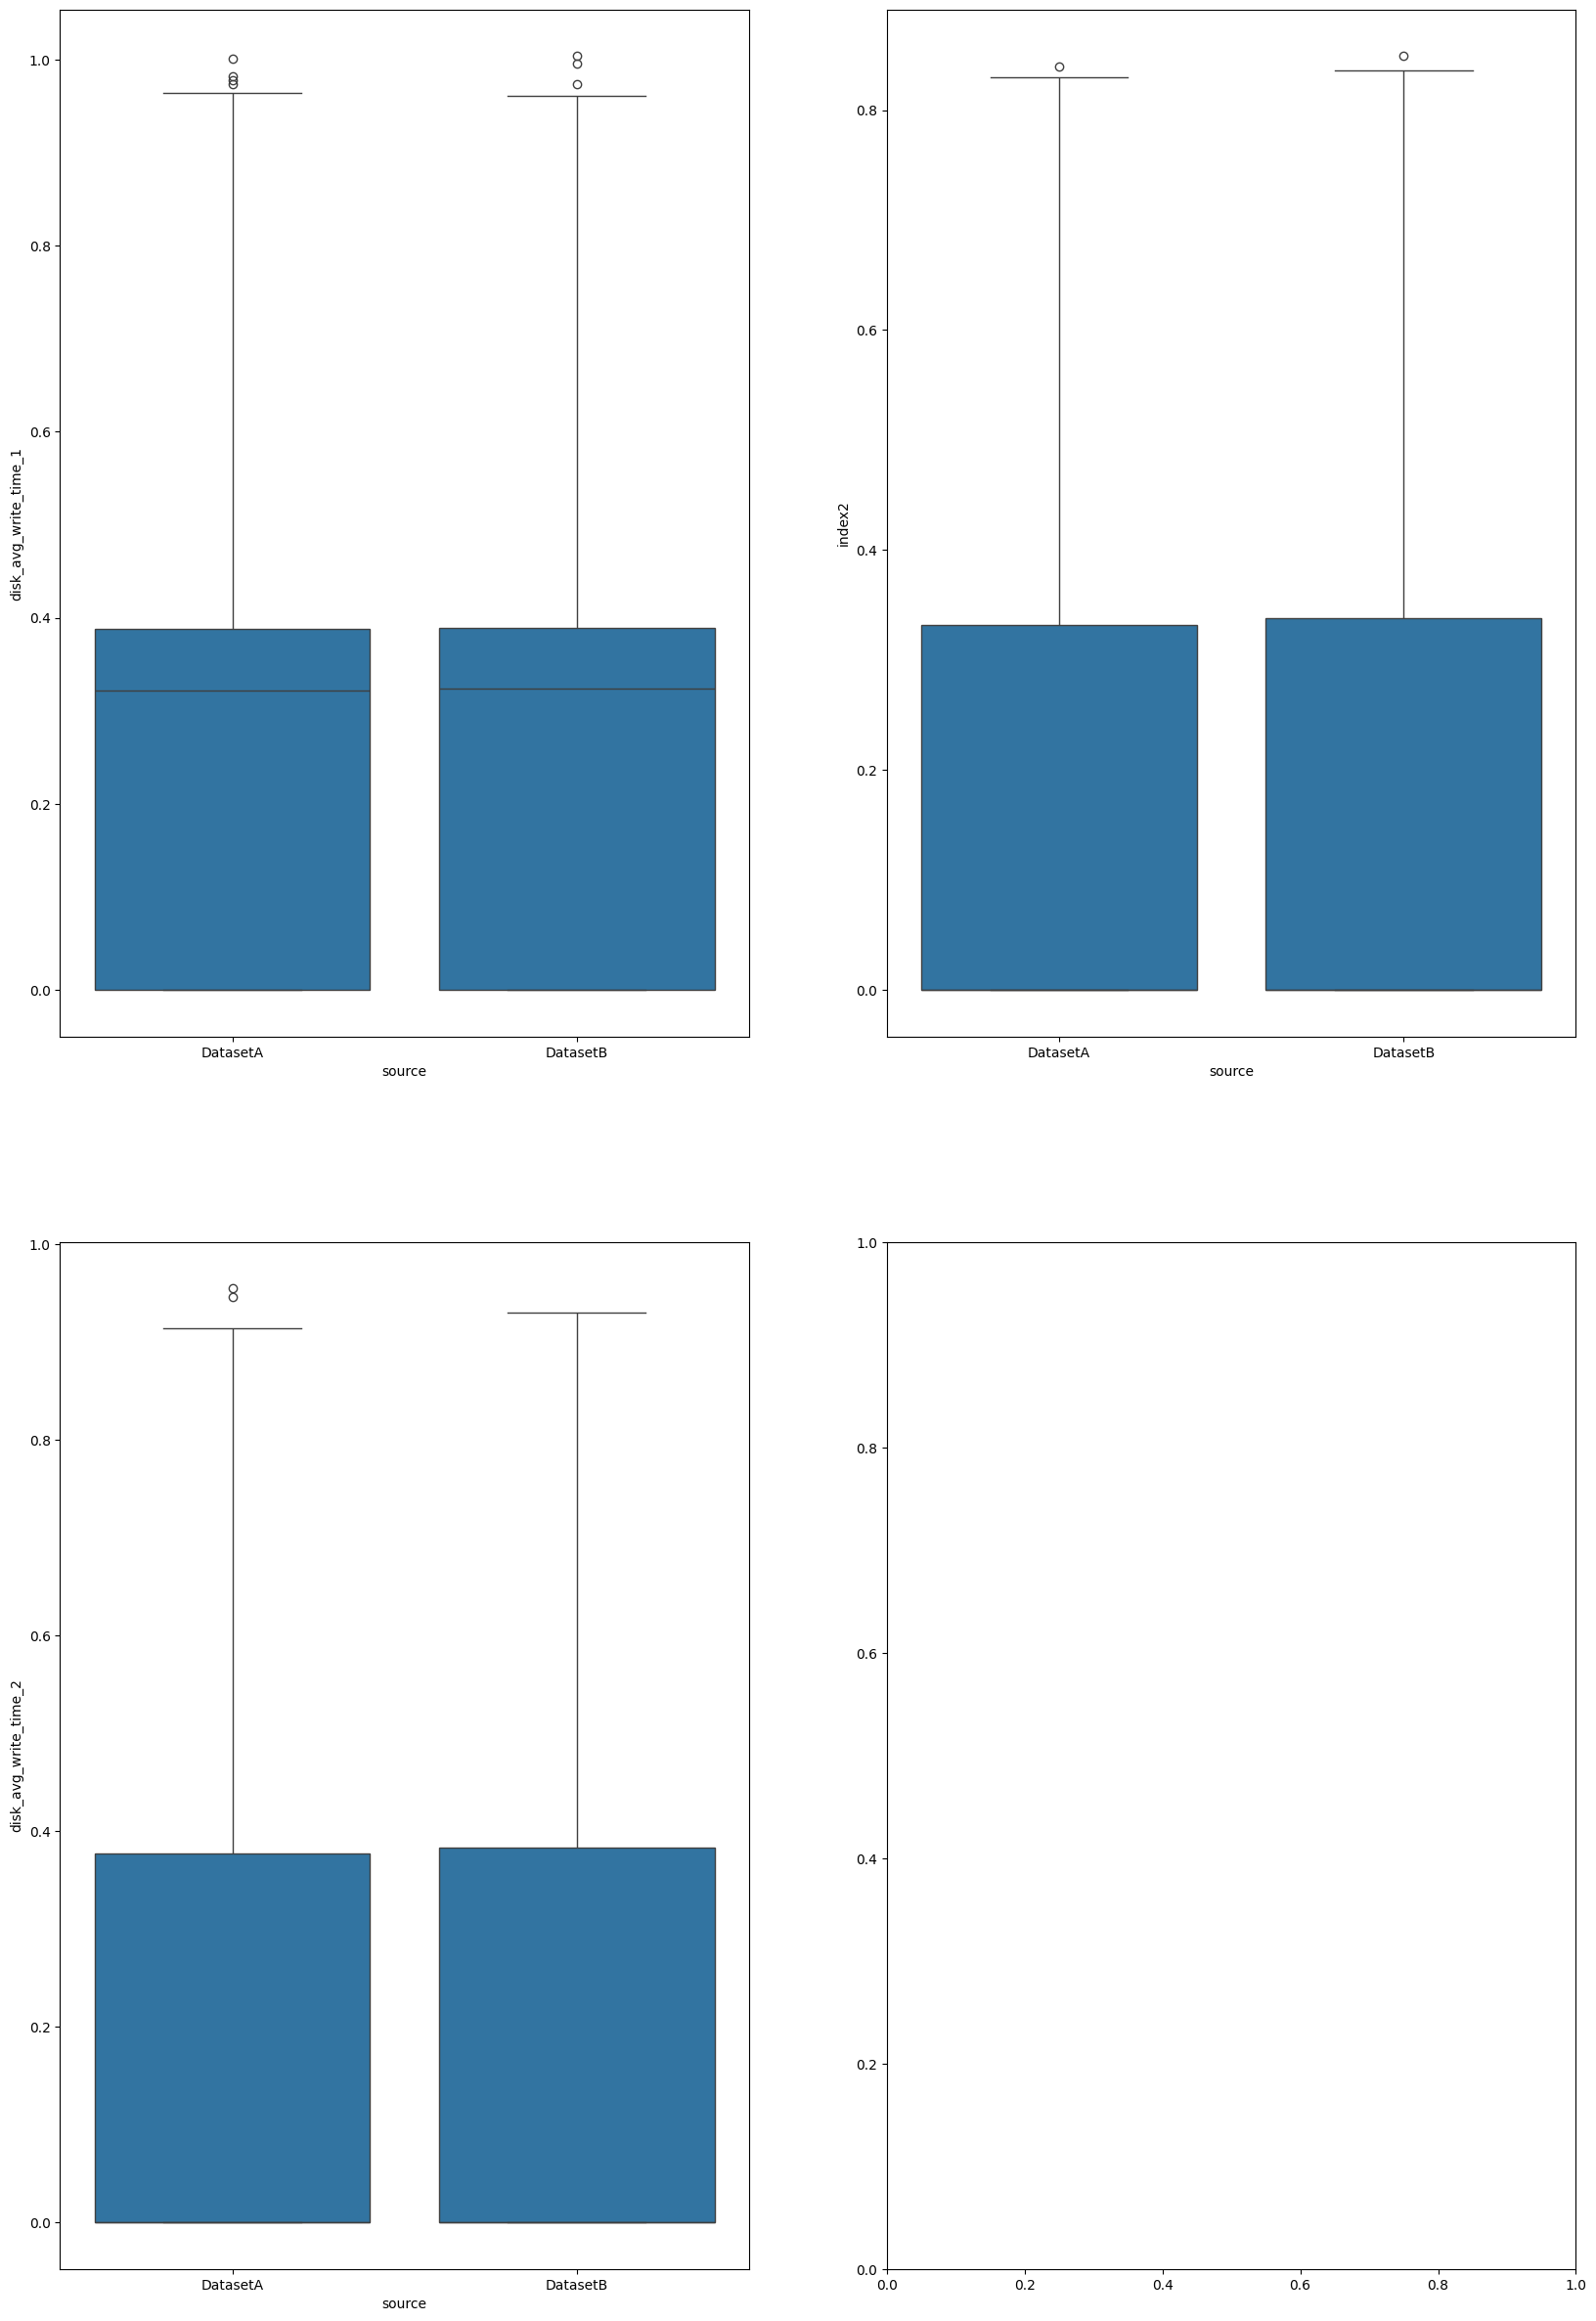

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,30))
axes = axes.flatten()
sns.boxplot(data=subset, x='source', y='disk_avg_write_time_1', ax = axes[0])
sns.boxplot(data=subset, x='source', y='index2', ax = axes[1])
sns.boxplot(data=subset, x='source', y='disk_avg_write_time_2', ax = axes[2])
